# Lecture : Introduction to Graph Science

## Lab 04 : Construct a network of text documents -- Exercise

### Xavier Bresson, Nian Liu  


In [2]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5284_2025_codes/codes/02_Graph_Science'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd
    

In [3]:
# Load libraries
import numpy as np
%matplotlib inline
#%matplotlib notebook 
import matplotlib.pyplot as plt
import pylab # 3D visualization
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
import scipy.io # import data
import sys; sys.path.insert(0, 'lib/')
from lib.utils import compute_ncut
from lib.utils import reindex_W_with_classes
from lib.utils import nldr_visualization
from lib.utils import construct_knn_graph
import warnings; warnings.filterwarnings("ignore")


### Question

In the previous notebook, we examined a graph of images and noted that the quality of the adjacency matrix construction remained relatively fine whether using Euclidean distance or cosine distance.

In this notebook, we will analyze a graph of text documents, where each document is represented by a histogram of words.

1. **Characteristics of Text Document Histograms:** What is the key feature of text documents represented by histograms of words?

2. **Compare Graph Construction Quality:** Run and compare the quality of graph construction both visually and quantitatively using the NCut graph partitioning algorithm, given the ground truth communities.

3. **Best Graph Construction Approach:** Determine which graph construction method — Euclidean distance or cosine distance — is more effective for this type of graph.


In [ ]:
# Load 10 classes of 4,000 text documents
mat = scipy.io.loadmat('datasets/20news_5classes_raw_data.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt']-1; Cgt=Cgt.squeeze()
nc = len(np.unique(Cgt))
print(n,d,nc)



# 2000 newspapers



2000 7939 5


In [5]:
# Compute the k-NN graph with L2/Euclidean distance
W_euclidean = construct_knn_graph(X, 10, 'euclidean')
#print(W_euclidean)


k-NN graph with euclidean distance


In [ ]:
Cncut,acc = compute_ncut(W_euclidean, Cgt, nc)
print(acc)


# accuracy is not high


20.349999999999998


In [ ]:
[reindexed_W_gt,reindexed_C_gt] = reindex_W_with_classes(W_euclidean,Cgt)
[reindexed_W_ncut,reindexed_C_ncut] = reindex_W_with_classes(W_euclidean,Cncut) 

# reindex the ground truth labels

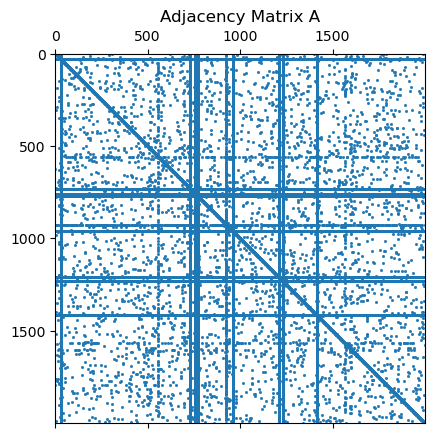

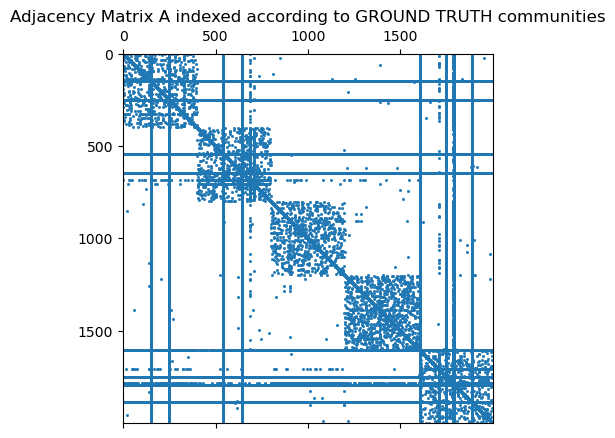

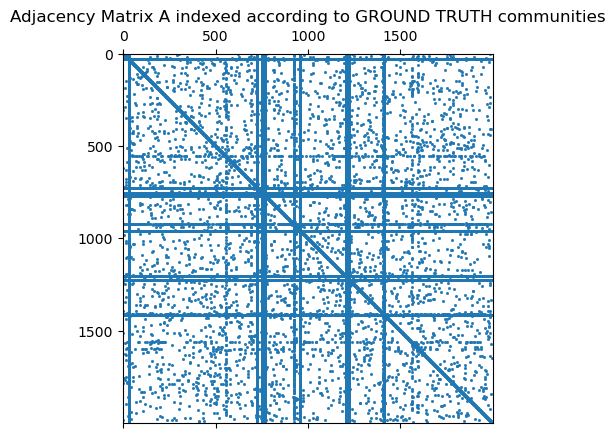

In [ ]:
plt.figure(1)
plt.spy(W_euclidean,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A')
plt.show()

plt.figure(2)
plt.spy(reindexed_W_gt,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A indexed according to GROUND TRUTH communities')
plt.show()

plt.figure(3)
plt.spy(reindexed_W_ncut,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A indexed according to NCUT TRUTH communities') # here it does not that well
plt.show()


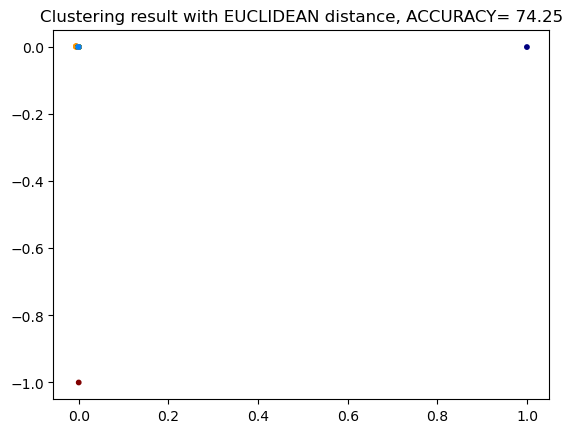

<Figure size 640x480 with 0 Axes>

In [19]:
# Visualization
[X,Y,Z] = nldr_visualization(W_euclidean)

plt.figure(4)
size_vertex_plot = 10
plt.scatter(X, Y, s=size_vertex_plot*np.ones(n), c=Cncut, color=pyplot.jet())
plt.title('Clustering result with EUCLIDEAN distance, ACCURACY= '+ str(acc))
plt.show()

# 3D Visualization
fig = pylab.figure(5)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Cncut, color=pyplot.jet())
pyplot.show()


In [14]:
# Compute the k-NN graph with Cosine distance
X = mat['X']
W_cosine = construct_knn_graph(X,10,'cosine')

Cncut, acc = compute_ncut(W_cosine, Cgt, nc)
print(acc)


k-NN graph with cosine distance
74.25


In [15]:
[reindexed_W_gt,reindexed_C_gt] = reindex_W_with_classes(W_cosine,Cgt)
[reindexed_W_ncut,reindexed_C_ncut] = reindex_W_with_classes(W_cosine,Cncut)


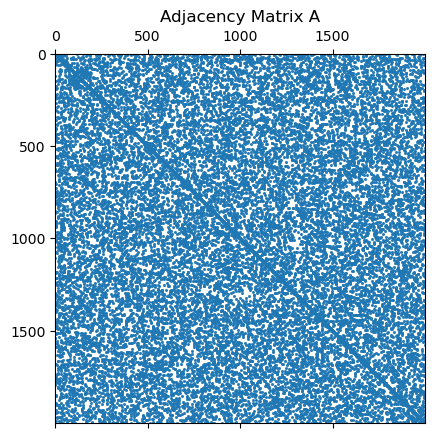

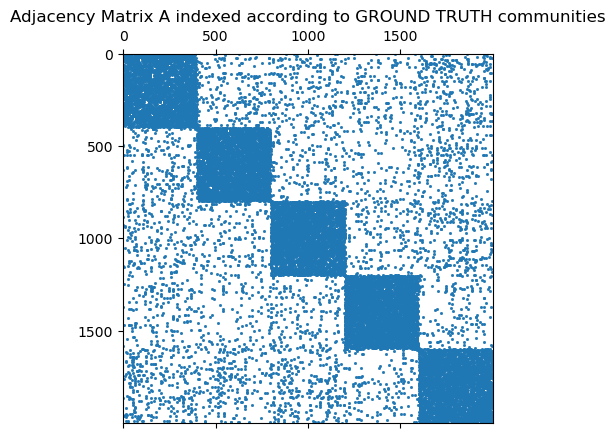

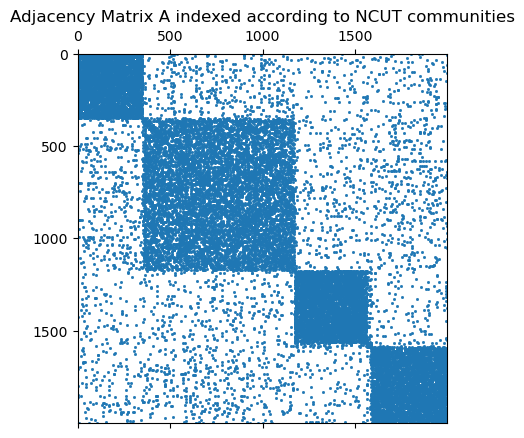

In [16]:
plt.figure(6)
plt.spy(W_cosine,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A')
plt.show()

plt.figure(7)
plt.spy(reindexed_W_gt,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A indexed according to GROUND TRUTH communities')
plt.show()

plt.figure(8)
plt.spy(reindexed_W_ncut,precision=0.01, markersize=1)
plt.title('Adjacency Matrix A indexed according to NCUT communities')
plt.show()


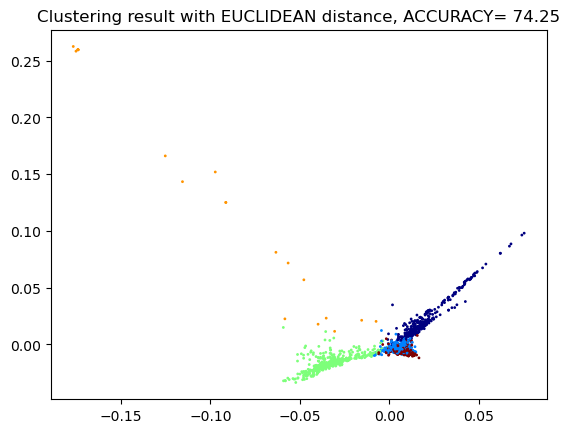

In [17]:
# Visualization
[X,Y,Z] = nldr_visualization(W_cosine)

plt.figure(9)
size_vertex_plot = 1
plt.scatter(X, Y, s=size_vertex_plot*np.ones(n), c=Cncut, color=pyplot.jet())
plt.title('Clustering result with EUCLIDEAN distance, ACCURACY= '+ str(acc))
plt.show()



In [18]:
# 3D Visualization
import plotly.graph_objects as go
data = go.Scatter3d(x=X, y=Y, z=Z, mode='markers', marker=dict(size=2, color=Cncut, colorscale='jet', opacity=1)) # data as points
# data = go.Scatter3d(x=Xvis, y=Yvis, z=Zvis, mode='markers', marker=dict(size=1, color=C, colorscale='jet', opacity=1, showscale=True)) # w/ colobar 
fig = go.Figure(data=[data]) 
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30, pad=0)) # tight layout but t=25 required for showing title 
fig.update_layout(autosize=False, width=600, height=600, title_text="3D visualization of 20newsgroups graph") # figure size and title
# fig.update_layout(scene = dict(xaxis = dict(visible=False), yaxis = dict(visible=False), zaxis = dict(visible=False))) # no grid, no axis 
# fig.update_layout(scene = dict(xaxis_title = ' ', yaxis_title = ' ', zaxis_title = ' ')) # no axis name 
fig.update_layout(scene = dict(zaxis = dict(showgrid = True, showticklabels = False), zaxis_title = ' ') ) # no range values, no axis name, grid on
fig.update_layout(scene = dict(yaxis = dict(showgrid = True, showticklabels = False), yaxis_title = ' ') ) # no range values, no axis name, grid on
fig.update_layout(scene = dict(xaxis = dict(showgrid = True, showticklabels = False), xaxis_title = ' ') ) # no range values, no axis name, grid on
fig.layout.scene.aspectratio = {'x':1, 'y':1, 'z':1}
fig.show()
